In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:/train.csv")

In [17]:
%matplotlib inline
import seaborn
seaborn.set()
print (data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [39]:
survived_class = data[data['Survived']==1]['Pclass'].value_counts()

In [40]:
print (survived_class)

1    136
3    119
2     87
Name: Pclass, dtype: int64


In [42]:
dead_class = data[data['Survived']==0]['Pclass'].value_counts()

In [43]:
print (dead_class)

3    372
2     97
1     80
Name: Pclass, dtype: int64


In [44]:
df_class = pd.DataFrame([survived_class,dead_class])

In [46]:
df_class.index = ['Survived','Dead']

In [47]:
print (df_class)

            1   2    3
Survived  136  87  119
Dead       80  97  372


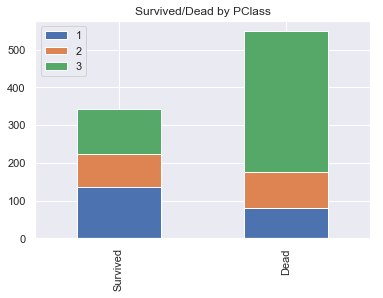

In [48]:
df_class.plot(kind='bar',stacked=True,title='Survived/Dead by PClass')

In [51]:
print (df_class.iloc[0,0])

136


In [58]:
survived1 = df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
survived2 = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
survived3 = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print ("Percentage Class1:",round(survived1))
print ("Percentage Class2:",round(survived2))
print ("Percentage Class3:",round(survived3))
from IPython.display import display
display(df_class)
df_class.plot(kind='bar',stacked='True')

Percentage Class1: 63.0
Percentage Class2: 47.0
Percentage Class3: 24.0


,1,2,3
Survived,136,87,119
Dead,80,97,372


In [59]:
print (data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


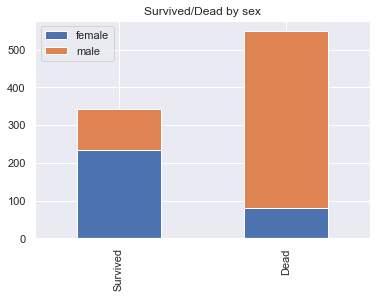

In [111]:
survived_sex = data[data['Survived'] == 1]['Sex'].value_counts()
dead_sex = data[data['Survived'] == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([survived_sex,dead_sex])
df_age.index = ['Survived','Dead']
df_age.plot(kind='bar',stacked=True,title="Survived/Dead by sex")

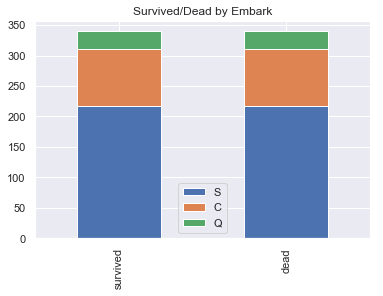

In [115]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==1]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['survived','dead']
df_embark.plot(kind='bar',stacked=True,title="Survived/Dead by Embark")

In [116]:
print (data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [121]:
x = data.drop(['PassengerId','SibSp','Parch','Ticket','Fare','Cabin'],axis='columns')

In [123]:
print (x.head())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age Embarked  
0    male  22.0        S  
1  female  38.0        C  
2  female  26.0        S  
3  female  35.0        S  
4    male  35.0        S  


In [124]:
y = x.Survived

In [138]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_x = LabelEncoder()
x.Sex=labelEncoder_x.fit_transform(x.Sex)
print (sum(x.Embarked.isnull()))

2


In [141]:
row_index = x.Embarked.isnull()
x.loc[row_index,'Embarked'] = 'S'

In [146]:
x = x.drop(['Embarked_S'], axis=1)

In [147]:
print (x)

     Pclass                                               Name  Sex   Age  \
0         3                            Braund, Mr. Owen Harris    1  22.0   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
2         3                             Heikkinen, Miss. Laina    0  26.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
4         3                           Allen, Mr. William Henry    1  35.0   
5         3                                   Moran, Mr. James    1   NaN   
6         1                            McCarthy, Mr. Timothy J    1  54.0   
7         3                     Palsson, Master. Gosta Leonard    1   2.0   
8         3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  27.0   
9         2                Nasser, Mrs. Nicholas (Adele Achem)    0  14.0   
10        3                    Sandstrom, Miss. Marguerite Rut    0   4.0   
11        1                           Bonnell, Miss. Elizabeth    0  58.0   

In [148]:
print (sum(x.Age.isnull()))

177


KeyError: 'Name'

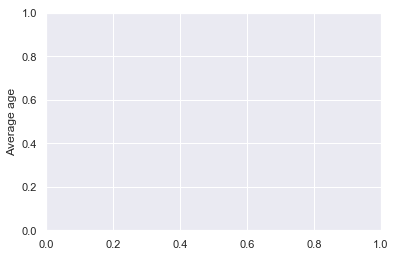

In [156]:
got = data.Name.str.split(',').str[1]
x.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]
ax=plt.subplot()
ax.set_ylabel('Average age')
x.groupby('Name').mean()['Age'].plot(kind='bar', ax=ax)
title_mean_age=[]
title_mean_age.append(list(set(x.Name)))
title_mean_age.append(x.groupby('Name').Age.mean())
title_mean_age
n_training = data.shape[0]
n_titles = len(title_mean_age[1])
for i in range(0, n_training):
    if np.isnan(x.Age[i])==True:
        for j in range(0, n_titles):
            if x.Name[i] == title_mean_age[0][j]:
                x.Age[i] = title_mean_age[1][j]

x = x.drop(['Name'],axis=1)

In [157]:
for i in range(0, n_training):
    if x.Age[i] > 18:
        x.Age[i]=0
    else:
        x.Age[i]=1
x.head()

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,Mr.,1.0,0,0
1,1,Mrs.,1.0,1,0
2,3,Miss.,1.0,0,0
3,1,Mrs.,1.0,0,0
4,3,Mr.,1.0,0,0


In [153]:
print (x)

     Pclass      Sex  Age  Embarked_C  Embarked_Q
0         3      Mr.  0.0           0           0
1         1     Mrs.  0.0           1           0
2         3    Miss.  0.0           0           0
3         1     Mrs.  0.0           0           0
4         3      Mr.  0.0           0           0
5         3      Mr.  1.0           0           1
6         1      Mr.  0.0           0           0
7         3  Master.  1.0           0           0
8         3     Mrs.  0.0           0           0
9         2     Mrs.  1.0           1           0
10        3    Miss.  1.0           0           0
11        1    Miss.  0.0           0           0
12        3      Mr.  0.0           0           0
13        3      Mr.  0.0           0           0
14        3    Miss.  1.0           0           0
15        2     Mrs.  0.0           0           0
16        3  Master.  1.0           0           1
17        2      Mr.  1.0           0           0
18        3     Mrs.  0.0           0           0


In [158]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_x = LabelEncoder()
x.Sex=labelEncoder_x.fit_transform(x.Sex)

In [164]:
print (x)

     Pclass  Sex  Age  Embarked_C  Embarked_Q
0         3   11  1.0           0           0
1         1   12  1.0           1           0
2         3    8  1.0           0           0
3         1   12  1.0           0           0
4         3   11  1.0           0           0
5         3   11  1.0           0           1
6         1   11  1.0           0           0
7         3    7  1.0           0           0
8         3   12  1.0           0           0
9         2   12  1.0           1           0
10        3    8  1.0           0           0
11        1    8  1.0           0           0
12        3   11  1.0           0           0
13        3   11  1.0           0           0
14        3    8  1.0           0           0
15        2   12  1.0           0           0
16        3    7  1.0           0           1
17        2   11  1.0           0           0
18        3   12  1.0           0           0
19        3   12  1.0           1           0
20        2   11  1.0           0 